#Модель развития города

##Формулировка задания:
1. Построить действующую модель города в матричной постановке. Модель д.б. «хорошей».

1. Провести необходимое количество серий экспериментов для определения стратегии по управлению моделью с целью достижения стационарного процесса с заданными значениями критериальных переменных состояния модели. 

1. Описание модели:

  1. Основная цель модели города – достижение заданного уровня средней обеспеченности населения города жильем (жилищным фондом), задавая значения управления (подготовка строителей из числа жителей города  и ввоз новых строителей из внешней среды). Управление в общем случае задается как функция времени.
  1. Параметры модели: постоянное выбытие жилого фонда и строителей.
1.	Планирование проведения экспериментов.
  1.	Определить постоянное во времени управление, приводящее к стационарному процессу с заданным значением критериальной переменной.
  1.	Определить управление, которое приводит модель к состоянию, совпадающему с состоянием модели п.4.а. в стационарном процессе, **за первые 10 точек фиксированной сетки времени**. В последующем д.б. стационарный процесс с заданным значением критериальной переменной и и значением количества строителей п.4.а.



##Исходные данные по заданию:

Критериальные переменные |Обозначение|Значение
-------------------|------------------|--------
Вариант| |4
Население | $R_t$|60
Жилищный фонд|$S_t$|0
Выбытие жилья|$B_S$| 15%
Строители|$Y_t$|0
Выбытие строителей|$B_Y$|10%
Ввоз строителей|$Z_t$|*искомый* (1)
Производительность|$A$|7
Обучение|$K_t$|*искомый* (0.05)
Обеспеченность жильем|$\frac{R_t}{S_t}$|3.70




---



### Подход к решению задания:

1. Для решения поставленного задания будем использовать следующие фунциональные зависимости:

* $R_{t+1} = R_t+Z_t$

* $S_{t+1}=S_t-B_SS_t+AY_t$

* $Y_{t+1}=Y_t-B_yY_t+K_t(R_t-Y_t)+Z_t$

* $X_t -$ вектор состояния

* $X_{t+1}=CX_t+Z$

* $X_t =
 \begin{pmatrix}
  R_t \\
  S_t \\
  Y_t
 \end{pmatrix}$

* $C =
 \begin{pmatrix}
  1 & 0 & 0 \\
  0 & 1-B_S & A \\
  K_t & 0 & 1-B_y-K_t
 \end{pmatrix}$

* $Z_t =
 \begin{pmatrix}
  Z_t \\
  0 \\
  Z_t
 \end{pmatrix}$

где

Критериальные переменные |Обозначение
-------------------|------------------
Население | $R_t$
Жилищный фонд|$S_t$
Выбытие жилья|$B_S$
Строители|$Y_t$
Выбытие строителей|$B_Y$
Ввоз строителей|$Z_t$
Производительность|$A$
Обучение|$K_t$
Обеспеченность жильем|$\frac{R_t}{S_t}$


2. Зададим произвольным образом управление в первые десять лет по параметрам ввоз строителей и обучение:


```
  builder_up_first_10_years = [1, 0.5, 0, 0, 0, 0, 0, 0, 0.2, 0.2]
  education_first_10_years = [0.05, 0.05, 0.009, 0.008, 0.008, 0.007, 0.007, 0.006, 0.006, 0.003]
```

В качесте параметра рандомайзера для числа родившихся и умерших будем использовать нормальное распределение с параметрами $μ = 3, σ = 0.15$. 


3. Используя функциональные зависимости, описанные в п. 1, определим состояния критериальных переменных (за исключением переменных, являющихся управлением) в момент времени $t = 11$.

4. Для определения управления моделью, начиная с 11-го года, рассмотрим массив из 10 000 комбинаций различных значений ввоза строителей и обучения:


```
  builders_and_education_combinations = []
  for educ_l in range(1,101):
    builders_up_start = 0
    for build_up in range(100):
      builders_up_start += 0.001
      builders_and_education_combinations.append({'Education level': educ_l, 'Builders up': builders_up_start})
```

5. Для каждой из 10 000 комбинаций массива построим имитационную модель и сохраним вектор обеспеченности жильем для 11-100 годов:


```
  for combination in builders_and_education_combinations:
    housing_level_data = []
    for t in range (10,101):
      born = random.gauss(mu, sigma)
      dead = random.gauss(mu, sigma)
      population = population + combination['Builders up'] + born - dead
      housing = housing * (1 - housing_down) + productivity * builders
      builders = builders * (1 - builders_down) + (population - builders) * combination['Education level'] / 1000 + combination['Builders up']
      housing_level = housing / population   
      housing_level_data.append(housing_level)
```

6. Таким образом, обладая 10 тыс. временными рядами обеспеченности жильем, мы должны выбрать наилучший из них, т.е. наиболее подходящий в качестве решения текущей задачи. Для определения наилучшего временного ряда обеспеченности жильем будем использовать следующие критерии:
* Временной ряд должен быть стационарным. Проверка стационарности будет производиться при помощи KPSS теста. P-value < уровня значимости означает стационарность ряда.
* Среднее значения ряда находится в пределах $3.7 {\displaystyle \pm } 0.05$ (по условию уровень обеспеченности жильем должен быть равен 3.7).

7. Временной ряд, соответствующий указанным в п. 6 критериям, будет определяться управлением, являющимся решением.

Код ниже является технической частью решения, позволяющей импортировать из архива библиотеку arch, содержащую в себе, в числе прочих, тесты на наличие единичных корней, позволяющие определить стационарность или нестационарность процесса.

In [1]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 45.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
def city_model_compl(population = 150,
                     housing = 100,
                     housing_down = 0.05,
                     builders = 9,
                     builders_down = 0.07,
                     productivity = 3,
                     housing_level_goal = 3,
                     n = 50,
                     mu = 2,
                     sigma = 0.15):
  
  import random
  import pandas as pd
  import numpy as np
  from arch.unitroot import KPSS
  import seaborn as sns
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')

  city_data = []

  # builder_up_first_10_years = [0, 0, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
  # education_first_10_years = [0.05, 0.01, 0.01, 0.01, 0.008, 0.007, 0.007, 0.01, 0.01, 0.01]

  builder_up_first_10_years = [1, 1, 0.8, 0.03, 0.03, 0.04, 0.4, 0.6, 1, 1]
  education_first_10_years = [80, 12, 10, 4, 3, 2, 2, 2, 2, 2]
  for t, builders_up, education in zip(range(10), builder_up_first_10_years, education_first_10_years):
  # Для первых 10 лет, в течение к-х ввоз строителей и обучение могут варьироваться, считаем:
    born = random.gauss(mu, sigma)
    dead = random.gauss(mu, sigma)
    population = population + builders_up + born - dead
    housing = housing * (1 - housing_down) + productivity * builders
    builders = builders * (1 - builders_down) + (population - builders) * education / 1000 + builders_up
    # housing_level = housing / population
  

  #Создадим массив, в котором будет содержаться массив из 100 * 100 комбинаций education_90years и builders_up_90years
  builders_and_education_combinations = []
  for educ_l in range(1,101):
    builders_up_start = 0
    for build_up in range(100):
      builders_up_start += 0.001
      builders_and_education_combinations.append({'Education level': educ_l, 'Builders up': builders_up_start})
  
  # Для каждой комбинации рассчитаем уровень обеспеченности жильем:
  for combination in builders_and_education_combinations:
    housing_level_data = []
    for t in range (10,101):
      born = random.gauss(mu, sigma)
      dead = random.gauss(mu, sigma)
      population = population + combination['Builders up'] + born - dead
      housing = housing * (1 - housing_down) + productivity * builders
      builders = builders * (1 - builders_down) + (population - builders) * combination['Education level'] / 1000 + combination['Builders up']
      housing_level = housing / population   
      housing_level_data.append(housing_level)
    combination['Mean of housing level'] = np.array(housing_level_data).mean()
    combination['Standard deviation of housing level'] = np.array(housing_level_data).std()
    combination['Stationarity'] = KPSS(lags = 0, y = housing_level_data).pvalue

  df_combinations = pd.DataFrame(builders_and_education_combinations)
  return df_combinations


Код, определяющий функцию выше, составляет для 10 000 вариантов управления таблицу, состояющую из 6 столбцов:
* порядковый номер комбинации;
* уровень образования (в процентах);
* ввоз строителей;
* среднее значение уровня обеспеченности жильем для 11-100 годов;
* стандартное отклонение ряда обеспеченности жильем;
* p-value KPSS-теста на стационарность.

In [3]:
combin = city_model_compl()

In [4]:
combin

,Education level,Builders up,Mean of housing level,Standard deviation of housing level,Stationarity
0,1,0.001,2.279977,1.077781,0.000100
1,1,0.002,0.884847,0.036279,0.000100
2,1,0.003,0.858317,0.002800,0.000100
3,1,0.004,0.859458,0.003372,0.000100
4,1,0.005,0.866101,0.003469,0.000100
...,...,...,...,...,...
9995,100,0.096,35.293163,0.000342,0.000100
9996,100,0.097,35.293291,0.000380,0.001279
9997,100,0.098,35.292574,0.000314,0.014738
9998,100,0.099,35.293510,0.000432,0.000100


Код ниже выбирает из 10 000 строк подходящую нам в соответствии с ограничением на среднее значение обеспеченности жильем и стационарность процесса.

In [5]:
mask = (combin['Mean of housing level'] >= 2.9) & (combin['Mean of housing level'] <= 3.1)
combin[mask]

,Education level,Builders up,Mean of housing level,Standard deviation of housing level,Stationarity
300,4,0.001,2.988316,0.228207,0.0001


Код ниже задает визуализации значений обеспеченности жильем для всех 100 лет функционирования модели для оптимальных параметров уровень образования и ввоз строителей, определенных таблицей выше: 

In [6]:
def visualize(education_level_90 = 4, builders_up_90 = 0.003, mu = 2, sigma = 0.15, 
              housing_down = 0.05, builders_down = 0.07, productivity = 3, population = 150):
  
  import matplotlib.pyplot as plt
  import pandas as pd 
  import numpy as np 
  import seaborn as sns 
  import random 

  housing, builders = 0, 0
  # builder_up_first_10_years = [1, 1, 0.8, 0.03, 0.03, 0.04, 0.4, 0.6, 1, 1]
  # education_first_10_years = [0, 0, 0, 0.02, 0.02, 0.02, 0.02, 0, 0, 0.04]

  builder_up_first_10_years = [1, 1, 0.8, 0.03, 0.03, 0.04, 0.4, 0.6, 1, 1]
  education_first_10_years = [80, 12, 10, 4, 3, 2, 2, 2, 2, 2]

  housing_level_data = [] # Здесь будут значения за 1-10 (сначала), 11-100 (затем) годы. 

  for t, builders_up, education in zip(range(10), builder_up_first_10_years, education_first_10_years):
  # Для первых 10 лет, в течение к-х ввоз строителей и обучение могут варьироваться, считаем:
    born = random.gauss(mu, sigma)
    dead = random.gauss(mu, sigma)
    population = population + builders_up + born - dead
    housing = housing * (1 - housing_down) + productivity * builders
    builders = builders * (1 - builders_down) + (population - builders) * education / 1000 + builders_up
    housing_level = housing / population
    housing_level_data.append(housing_level)
  
  for t in range (10,101):
    born, dead = np.random.normal(mu, sigma), np.random.normal(mu, sigma)
    population = population + builders_up + born - dead
    housing = housing * (1 - housing_down) + productivity * builders
    builders = builders * (1 - builders_down) + (population - builders) * education_level_90 / 1000 + builders_up_90
    housing_level = housing / population   
    housing_level_data.append(housing_level)
  
  # Визуализация
  plt.style.use('seaborn')
  housing_level_data = pd.DataFrame(housing_level_data)
  fig, ax = plt.subplots(figsize = (19, 7))
  ax.set_title('Уровень обеспеченности жильем в течение 100 лет в городе'.upper(), size = 25, y = 1.05)
  sns.scatterplot(data = housing_level_data, x = range(0, 101), y = housing_level_data[0], color = 'blueviolet', label = '')
  ax.set_xticks(np.arange(0, 102, 5))
  # ax.set_yticks(np.arange(0, 5, 0.5))
  ax.set_xlabel('Год', size = 18)
  ax.set_ylabel('Обеспечение жильем', size = 18)
  # ax.axhline(3.7, linewidth=2, color='grey', linestyle='solid', label = 'Целевая обеспеченность жильем')
  ax.axvline(10, linewidth=2, color='blue', linestyle='--')
  ax.legend(fontsize = 15)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.show()

No handles with labels found to put in legend.


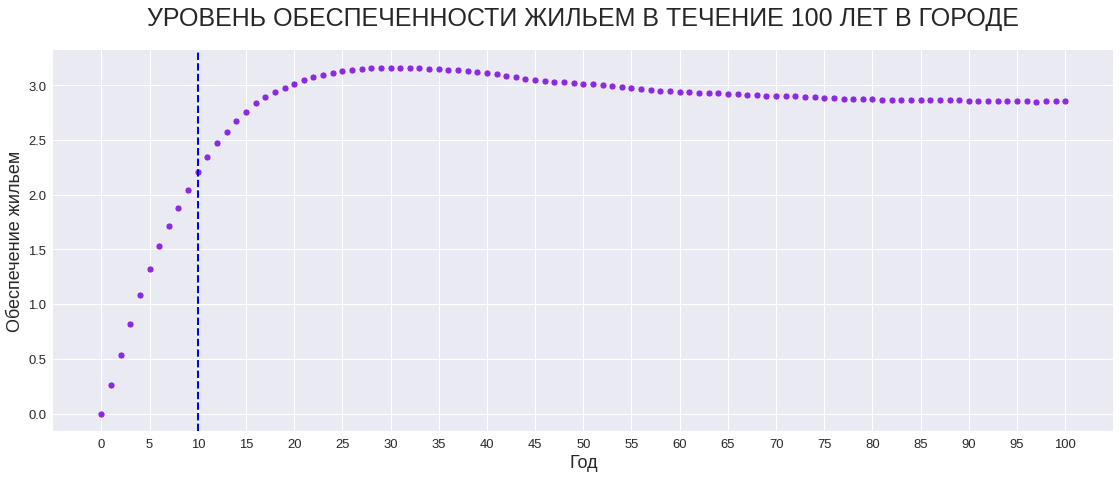

In [7]:
visualize()